In [1]:
!pip install tensorflow-gpu==2.0rc

In [2]:
!pip installl mlxtend

ERROR: unknown command "installl" - maybe you meant "install"


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Conv1D , MaxPool1D , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn import datasets , metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
cancer = datasets.load_breast_cancer()

In [0]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = cancer.target

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0, stratify = y)

In [12]:
print(X_test.shape,X_train.shape)

(114, 30) (455, 30)


In [0]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [0]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [0]:
model = Sequential()
model.add(Conv1D(32,kernel_size = 2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,kernel_size = 2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [0]:
model.compile(optimizer=Adam(lr = 0.00005),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [18]:
history = model.fit(X_train,y_train,10,50,1,validation_data=(X_test,y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
455/455 [==============================] - 2s 4ms/sample - loss: 0.7070 - accuracy: 0.6637 - val_loss: 0.5859 - val_accuracy: 0.8860
Epoch 2/50
455/455 [==============================] - 0s 824us/sample - loss: 0.5228 - accuracy: 0.7824 - val_loss: 0.4788 - val_accuracy: 0.8684
Epoch 3/50
455/455 [==============================] - 0s 812us/sample - loss: 0.3224 - accuracy: 0.8571 - val_loss: 0.3934 - val_accuracy: 0.8596
Epoch 4/50
455/455 [==============================] - 0s 864us/sample - loss: 0.3092 - accuracy: 0.8681 - val_loss: 0.3228 - val_accuracy: 0.8772
Epoch 5/50
455/455 [==============================] - 0s 838us/sample - loss: 0.2880 - accuracy: 0.8835 - val_loss: 0.2681 - val_accuracy: 0.9211
Epoch 6/50
455/455 [==============================] - 0s 829us/sample - loss: 0.3144 - accuracy: 0.8901 - val_loss: 0.2242 - val_acc

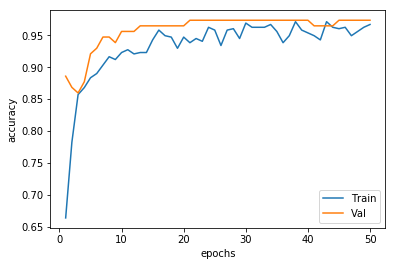

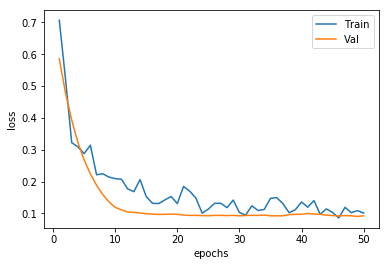

In [19]:
epoch_Range = range(1,51)
plt.plot(epoch_Range,history.history['accuracy'])
plt.plot(epoch_Range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()
plt.plot(epoch_Range,history.history['loss'])
plt.plot(epoch_Range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()